In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
#from getdist import plots, MCSamples
import numpy as np
import zeus
print('zeus version:', zeus.__version__)

zeus version: 0.9.3


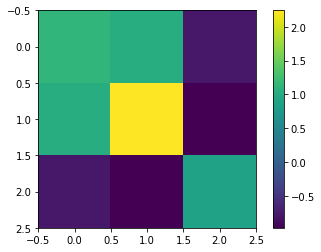

In [2]:
ndim = 3
nwalkers = 2*ndim*2
nsteps= 5000

C = make_spd_matrix(ndim)
#C = np.identity(ndim)
plt.imshow(C)
plt.colorbar()

icov = np.linalg.inv(C)

mu = np.random.rand(ndim) * 10.0
#mu  = np.zeros(ndim)

def logp(x, mu, icov):
    return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))

#start = np.random.rand(ndim)
start = mu + 1.0 * np.random.randn(nwalkers,ndim)

In [ ]:
from multiprocessing import Pool

with Pool() as pool:
    sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov], pool=pool)
    sampler.run(start, nsteps)

In [3]:
sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov])
sampler.run(start, nsteps)

Initialising ensemble of 12 walkers...
Sampling progress : 100%|██████████| 5000/5000 [00:02<00:00, 2065.78it/s]
Sampling Complete!


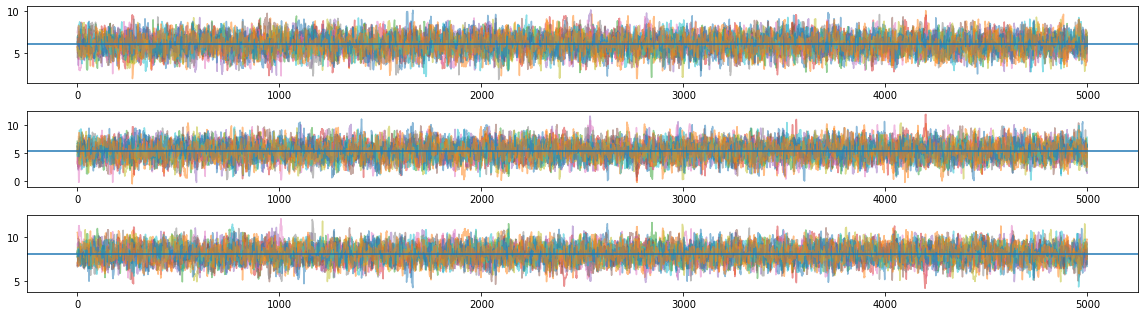

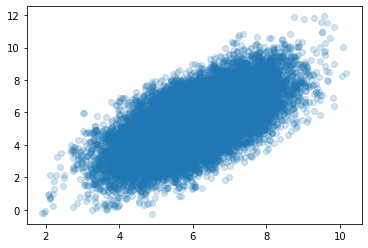

Summary
-------
Number of Generations: 5000
Number of Parameters: 3
Number of Walkers: 12
Mean Integrated Autocorrelation Time: 8.9
Effective Sample Size: 6742.82
Number of Log Probability Evaluations: 129148
Effective Samples per Log Probability Evaluation: 0.05221


MCMC mean: [6.05959623 5.36255459 8.08723539]
TRUE mean: [6.05580415 5.34503261 8.08231818]
MCMC std: [1.06174968 1.50733087 0.94283623]
TRUE std: [1.06701319 1.49729876 0.93811839]


In [4]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(nsteps),sampler.chain[:,:,n].T,alpha=0.5)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

trace = sampler.flatten(burn=int(nsteps/2))
plt.scatter(trace[:,0],trace[:,1], alpha=0.2)
plt.show()

print('MCMC mean:', np.mean(trace, axis=0))
print('TRUE mean:', mu)
print('MCMC std:', np.std(trace, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))

sampler.summary

In [ ]:
sampler.one_sigma

In [ ]:
sample = MCSamples(samples=trace)
g = plots.getSubplotPlotter(width_inch=14)
g.triangle_plot([sample], filled=True, shaded=False)

In [ ]:
from itertools import permutations, starmap
import random

In [ ]:
perms = list(permutations(np.arange(10),2))
pairs = random.sample(perms,10)
#directions = self.mu * np.array(list(starmap(vec_diff,pairs))) * gamma

In [ ]:
np.asarray(pairs).T[0]

In [ ]:
low = np.array([-1.0,0.0])
high = np.array([0.0,1.0])

In [ ]:
np.random.uniform(low,high)